In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk import pos_tag
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
import string
import re

In [3]:
df = pd.read_csv('../Data/judge-1377884607_tweet_product_company.csv', encoding='Latin-1')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [4]:
df.emotion_in_tweet_is_directed_at.value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [5]:
df.dropna(subset=['tweet_text'], inplace=True)

In [6]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [7]:
df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [8]:
df['tweet_text'][2]

'@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.'

In [9]:
df['tweet_text'][8160]

'All you #SXSW tweeps, Check out our homies @mention this Thursday. {link}'

In [10]:
sample_document = df['tweet_text'].iloc[1]
sample_document

"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW"

In [11]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenizer = RegexpTokenizer(pattern)
sample_doc = tokenizer.tokenize(sample_document)
sample_doc = [token.lower() for token in sample_doc]
sw = stopwords.words('english')
sample_doc = [token for token in sample_doc if token not in sw]
sample_doc

['jessedee',
 'know',
 'fludapp',
 'awesome',
 'ipad',
 'iphone',
 'app',
 'likely',
 'appreciate',
 'design',
 'also',
 "they're",
 'giving',
 'free',
 'ts',
 'sxsw']

In [12]:
type(sw)

list

In [13]:
type(sample_doc)

list

In [14]:
def Find_Apple_or_Google(text):
    
    category =''
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    tokenizer = RegexpTokenizer(pattern)
    sample_doc = tokenizer.tokenize(text)
    sample_doc = [token.lower() for token in sample_doc]
    sw = stopwords.words('english')
    sample_doc = [token for token in sample_doc if token not in sw]

    ap = ['apple', 'ipad', 'iphone']
    go = ['google','android']
    if any((match := item) in sample_doc for item in ap): 
        return 'Apple'
    elif any((match := item) in sample_doc for item in go): 
        return 'Google'
    else: 
        return 'NAN'


In [15]:
ap = ['apple', 'ipad', 'iphone']
go = ['google','android']

In [16]:
if any((match := item) in sample_doc for item in ap):
   
    print(match)


ipad


In [17]:
Find_Apple_or_Google(df['tweet_text'].iloc[9091])

'Google'

In [18]:
Find_Apple_or_Google(df['tweet_text'].iloc[8160])

'Apple'

In [19]:
df['Product_Category'] = df['tweet_text'].apply(lambda x: Find_Apple_or_Google(x))

In [20]:
df['tweet_text'].iloc[0]

'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'

In [21]:
X = df['tweet_text']
y = df['is_there_an_emotion_directed_at_a_brand_or_product']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
X_train

8605    Perfect attention to detail RT @mention Google...
1303    my iphone was stolen and I got it back !!!!!! ...
8759    fuck I love Austin. Just left the Youtube Goog...
5021    Spotted something rare a few minutes ago...a p...
3210    @mention fyi  RT @mention I'll be at the Austi...
                              ...                        
5735    RT @mention For those #notatSXSW (or at #SXSW)...
5192    RT @mention &quot;the future of local is conte...
5391    RT @mention Android may be gaining market shar...
861     .@mention Love it. @mention @mention #sxsw: &q...
7271    Anyone know status of iPad 2s in Austin pop-up...
Name: tweet_text, Length: 6819, dtype: object

In [23]:
train_sample = X_train.sample(5, random_state=22)
train_sample["Emotion"] = [y_train[val] for val in train_sample.index]
train_sample

3330       @mention Google Circles by @mention stresses c...
2792       I am so jealous of @mention because she's at #...
7867       Android vs IPhone at  #SXSW which side are you...
8850       Tired of waiting in line @mention stores? Best...
7641       &quot;There's a reason why Google isn't in soc...
Emotion    [No emotion toward brand or product, No emotio...
Name: tweet_text, dtype: object

In [24]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

In [25]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: remove_punct(x))

In [26]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

In [27]:
df['Tweet_tokenized'] = df['tweet_text'].apply(lambda x: tokenization(x.lower()))

In [28]:
stopword = nltk.corpus.stopwords.words('english')

In [29]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

In [30]:
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))

In [31]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text


In [32]:
df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))

In [33]:
df.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,Product_Category,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,wesley I have a G iPhone After hrs tweeting a...,iPhone,Negative emotion,Apple,"[wesley, i, have, a, g, iphone, after, hrs, tw...","[wesley, g, iphone, hrs, tweeting, riseaustin,...","[wesley, g, iphon, hr, tweet, riseaustin, dead..."
1,jessedee Know about fludapp Awesome iPadiPhon...,iPad or iPhone App,Positive emotion,Apple,"[jessedee, know, about, fludapp, awesome, ipad...","[jessedee, know, fludapp, awesome, ipadiphone,...","[jessede, know, fludapp, awesom, ipadiphon, ap..."
2,swonderlin Can not wait for iPad also They sh...,iPad,Positive emotion,Apple,"[swonderlin, can, not, wait, for, ipad, also, ...","[swonderlin, wait, ipad, also, sale, sxsw]","[swonderlin, wait, ipad, also, sale, sxsw]"
3,sxsw I hope this years festival isnt as crashy...,iPad or iPhone App,Negative emotion,Apple,"[sxsw, i, hope, this, years, festival, isnt, a...","[sxsw, hope, years, festival, isnt, crashy, ye...","[sxsw, hope, year, festiv, isnt, crashi, year,..."
4,sxtxstate great stuff on Fri SXSW Marissa Maye...,Google,Positive emotion,Google,"[sxtxstate, great, stuff, on, fri, sxsw, maris...","[sxtxstate, great, stuff, fri, sxsw, marissa, ...","[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


In [35]:
df['tweet_text'][2]

'swonderlin Can not wait for iPad  also They should sale them down at SXSW'

In [50]:
df['lam_sentence'] =df['tweet_lam'].apply(lambda x: " ".join(x)) 

In [51]:
df['lam_sentence']

0       wesley g iphone hrs tweeting riseaustin dead n...
1       jessedee know fludapp awesome ipadiphone app y...
2                     swonderlin wait ipad also sale sxsw
3       sxsw hope years festival isnt crashy years iph...
4       sxtxstate great stuff fri sxsw marissa mayer g...
                              ...                        
9088                            ipad everywhere sxsw link
9089    wave buzz rt mention interrupt regularly sched...
9090    googles zeiger physician never reported potent...
9091    verizon iphone customers complained time fell ...
9092     ï ïà ü ê î ò á ââ â ûârt mention google tests...
Name: lam_sentence, Length: 9092, dtype: object

In [ ]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) 
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    
    text = [ps.stem(word) for word in tokens if word not in stopword] 
    return text

In [36]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def visualize_top_10(freq_dist, title):

    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)

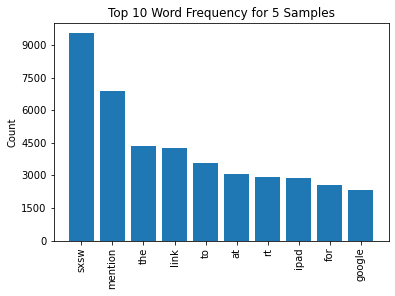

In [37]:
sample_freq_dist = FreqDist(df['Tweet_tokenized'].explode())
visualize_top_10(sample_freq_dist, "Top 10 Word Frequency for 5 Samples")

In [47]:

# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
    print("Sentence Overall Rated As", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
 
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
 
    else :
        print("Neutral")

In [ ]:
df['emotion'] =df['lemma_sentence'].apply(lambda x: sentiment_scores(x)) 

In [1]:
df

NameError: name 'df' is not defined